<a href="https://colab.research.google.com/github/Lucas-Petrus/DS-Unit-1-Sprint-2-Statistics/blob/master/Lucas_Petrus_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

column_headers = (['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])

In [22]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names= column_headers).replace({'?':np.NaN})
print(df.head())
print(df.shape)

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0   +
(690, 16)


In [16]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [19]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [41]:
#More Extreme
stats.ttest_ind(df['A11'], df['A15'])

Ttest_indResult(statistic=-5.117265164992354, pvalue=3.537855975639833e-07)

In [45]:
#Less Extreme
stats.ttest_ind(df['A8'], df['A11'])

Ttest_indResult(statistic=-0.7858075329285187, pvalue=0.43211534709421795)

In [23]:
df['A1'].value_counts().sort_index()

a    210
b    468
Name: A1, dtype: int64

In [29]:
df['A5'].value_counts().sort_index()

g     519
gg      2
p     163
Name: A5, dtype: int64

In [31]:
contingency = pd.crosstab(df['A1'], df['A5'])
contingency

A5,g,gg,p
A1,,,
a,167,1,40
b,344,1,119


In [32]:
#Less extreme Chi^2 example
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 3.552518728408426
p value 0.16927014245378488
degrees of freedom 2
expected frequencies table [[158.16666667   0.61904762  49.21428571]
 [352.83333333   1.38095238 109.78571429]]


In [33]:
df['A9'].value_counts().sort_index()

f    329
t    361
Name: A9, dtype: int64

In [34]:
df['A10'].value_counts().sort_index()

f    395
t    295
Name: A10, dtype: int64

In [35]:
contingency1 = pd.crosstab(df['A9'], df['A10'])
contingency1

A10,f,t
A9,,
f,262,67
t,133,228


In [36]:
#Extreme Chi^2 example

chi2, p_value, dof, expected = stats.chi2_contingency(contingency1)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 127.0473385738199
p value 1.813947266862159e-29
degrees of freedom 1
expected frequencies table [[188.34057971 140.65942029]
 [206.65942029 154.34057971]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

________________________________________________________________________________

p-value is: The probability of the null hypothesis being true, given the sample that we have collected.

p-value threshold: (1-confidence_level) = (1-.95) = .05

p-value < .05 -> Reject the Null Hypothesis

p-value >= .05 -> Fail to reject the null hypothesis (I'm not confident enough to rule out the null hypothesis)

More Extreme
stats.ttest_ind(df['A11'], df['A15'])
Less Extreme
stats.ttest_ind(df['A8'], df['A11'])



#MY ANSWERS

1.)For my first ttest comparing the classes of A11 to A15, we conclude that with a tstatistic of -5.11 and a pvalue of ~0 that we can reject the null hypothesis that these two class types are similar and instead accept the alternative hypothesis that they are different.

2.)For my second ttest comparing the classes of A8 and A11, we conclude that with a tstatistic of -0.78 and a pvalue of .432 that we fail to reject the null hypothesis that these two class types are different.
_________________

1.) For my first chi^2 test, we conclude that with a chi^2 stat of 3.55 and a pvalue of .169 that we fail to reject the null hypothesis that these two class types are different

2.)For my second chi^2, we conclude that with a chi^2 stat of 127.04 and a pvalue of ~0 that we can reject the null hypothesis that these two class types are similar and isntead accept the alternative hypothesis that they are different


## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



In Bayesian statistics, you start from what you have observed and then you assess the probability of future observations or model parameters. In frequentist statistics, you start from an idea (hypothesis) of what is true by assuming scenarios of a large number of observations that have been made.

The essential difference between Bayesian and Frequentist statisticians is in how probability is used.
Frequentists use probability only to model certain processes broadly described as “sampling”. They usually look at P(data| parameter), note the parameter is fixed, the data is random.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [50]:
#PART 1
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [66]:
#PART 1 Solution
df[column_headers] = df[column_headers].apply(pd.to_numeric, errors='coerce')
df.dtypes

A1     float64
A2     float64
A3     float64
A4     float64
A5     float64
A6     float64
A7     float64
A8     float64
A9     float64
A10    float64
A11      int64
A12    float64
A13    float64
A14    float64
A15      int64
A16    float64
dtype: object

In [80]:
#PART 2
def ttest_calc(i, confidence=.95):
  sample = np.array(i)
  n = len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  return (t)

ttest_calc(df['A15'])

#very confused on this part :\



1.963413002150705

In [0]:
#Part 3

def confidence_interval(data, confidence=.95):
  sample = np.array(data)
  x_bar = sample.mean()
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  std_err = s / np.sqrt(n)
  moe = std_err * t
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

sample1 = df.sample(50, random_state=20)

sample2 = df.sample(150, random_state=20)

CI2 = confidence_interval(sample1['A11'])

In [0]:
CI1 = confidence_interval(sample2['A15'])

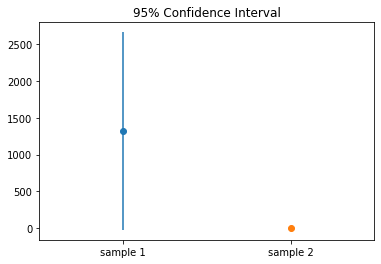

In [74]:
import matplotlib.pyplot as plt


plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% Confidence Interval')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

#part 4

The big difference between Bayesian Statistics and Frequentists Statistics is that the Bayesian Statiscian accounts for new information that is input into the system. The example used in class is probably the best visual example you could receive. 
With 3 doors there is the possibility of having 1  car behind the door. The frequentist statiscian will argue that even if one door is open showing us the result that your chances of picking the right door are now 50/50 since there are only 2 options left. 
The Bayesian statiscian sees things different, they approach this by accounting for new information saying "hey we just received another 33% in our favor, so we now have a 66% chance of picking the correct door this is no longer a 50/50 chance" By accounting for new information input into the system, we can increase our likelihood of picking the correct door by understanding we were given additional odds in our favor.